In [ ]:
# Part B: Classification on Red and White Wine Characteristics


In [ ]:
#Step 1: Import the Red and White Wine Datasets

In [ ]:
import pandas as pd

# Import the datasets with the correct separator
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Read red and white wine data
red_wine = pd.read_csv(red_wine_url, sep=';')
white_wine = pd.read_csv(white_wine_url, sep=';')

# Display the first few rows to confirm import
print(red_wine.head())
print(white_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
#Step 2: Add a winetype Column and Combine the Datasets

In [ ]:
# Add a new column "winetype" (0 for white wine, 1 for red wine)
white_wine['winetype'] = 0
red_wine['winetype'] = 1

# Combine both datasets into a single dataframe
wine_data = pd.concat([white_wine, red_wine], ignore_index=True)

# Check the combined dataset
wine_data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [ ]:
#Step 3: Visualize the Univariate Distribution of the Target Feature and Explanatory Variables

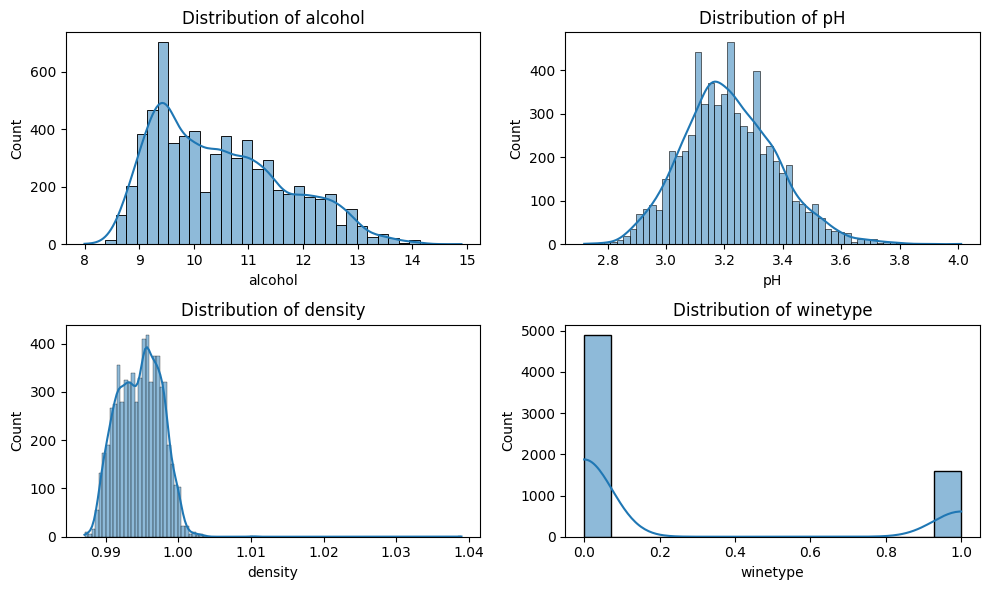

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose some continuous features to visualize
features = ['alcohol', 'pH', 'density', 'winetype']

# Plot univariate distributions for the target and explanatory variables
plt.figure(figsize=(10, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(wine_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
#Step 4: Split Data into Training and Test Sets and Build Classification Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define features and target
X = wine_data.drop(columns=['winetype'])
y = wine_data['winetype']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
penalized_log_reg = LogisticRegression(penalty='l2', max_iter=1000)
knn = KNeighborsClassifier()

# Evaluate using cross-validation
models = {'Logistic Regression': log_reg, 'Penalized Logistic Regression': penalized_log_reg, 'KNN': knn}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: Mean CV Score = {scores.mean():.4f}")


Logistic Regression: Mean CV Score = 0.9863
Penalized Logistic Regression: Mean CV Score = 0.9863
KNN: Mean CV Score = 0.9436


In [ ]:
#Step 5: Running the Models With and Without StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate models with StandardScaler
for name, model in models.items():
    scores_scaled = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"{name} with StandardScaler: Mean CV Score = {scores_scaled.mean():.4f}")


Logistic Regression with StandardScaler: Mean CV Score = 0.9935
Penalized Logistic Regression with StandardScaler: Mean CV Score = 0.9935
KNN with StandardScaler: Mean CV Score = 0.9929


In [ ]:
Step 6: Tuning Parameters Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Use GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)

print(f"KNN Best Parameters: {grid_knn.best_params_}")


KNN Best Parameters: {'n_neighbors': 9}


In [ ]:
#Step 7: Compare Coefficients of Logistic Regression and Penalized Logistic Regression

In [ ]:
# Fit the models
log_reg.fit(X_train_scaled, y_train)
penalized_log_reg.fit(X_train_scaled, y_train)

# Compare coefficients
print("Logistic Regression Coefficients:", log_reg.coef_)
print("Penalized Logistic Regression Coefficients:", penalized_log_reg.coef_)


Logistic Regression Coefficients: [[ 0.36907798  1.29401329 -0.36287684 -3.57862293  0.79205655  0.93706383
  -2.95310731  3.5087579   0.33391421  0.61707462  1.22368381  0.20372537]]
Penalized Logistic Regression Coefficients: [[ 0.36907798  1.29401329 -0.36287684 -3.57862293  0.79205655  0.93706383
  -2.95310731  3.5087579   0.33391421  0.61707462  1.22368381  0.20372537]]


In [ ]:
# Get the best estimator for KNN after tuning
knn_best = grid_knn.best_estimator_

# Perform cross-validation to get the final scores after scaling
log_reg_score = cross_val_score(log_reg, X_train_scaled, y_train, cv=5).mean()
penalized_log_reg_score = cross_val_score(penalized_log_reg, X_train_scaled, y_train, cv=5).mean()
knn_best_score = cross_val_score(knn_best, X_train_scaled, y_train, cv=5).mean()

# Output the scores for comparison
print(f"Logistic Regression Best Mean CV Score: {log_reg_score:.4f}")
print(f"Penalized Logistic Regression Best Mean CV Score: {penalized_log_reg_score:.4f}")
print(f"KNN Best Mean CV Score: {knn_best_score:.4f}")

# Find the best performing model based on the scores
if max(log_reg_score, penalized_log_reg_score, knn_best_score) == log_reg_score:
    best_model = 'Logistic Regression'
elif max(log_reg_score, penalized_log_reg_score, knn_best_score) == penalized_log_reg_score:
    best_model = 'Penalized Logistic Regression'
else:
    best_model = 'KNN'

print(f"The best performing model is: {best_model}")


Logistic Regression Best Mean CV Score: 0.9935
Penalized Logistic Regression Best Mean CV Score: 0.9935
KNN Best Mean CV Score: 0.9935
The best performing model is: KNN


In [ ]:
#Step 7: Compare Coefficients of Logistic Regression and Penalized Logistic Regression

In [ ]:
# Evaluate the models on the test set
log_reg_test_score = log_reg.score(X_test_scaled, y_test)
penalized_log_reg_test_score = penalized_log_reg.score(X_test_scaled, y_test)
knn_test_score = knn_best.score(X_test_scaled, y_test)

# Output test scores for comparison
print(f"Logistic Regression Test Set Score: {log_reg_test_score:.4f}")
print(f"Penalized Logistic Regression Test Set Score: {penalized_log_reg_test_score:.4f}")
print(f"KNN Test Set Score: {knn_test_score:.4f}")

# Choose the best model based on test set performance
if max(log_reg_test_score, penalized_log_reg_test_score, knn_test_score) == log_reg_test_score:
    best_model = 'Logistic Regression'
elif max(log_reg_test_score, penalized_log_reg_test_score, knn_test_score) == penalized_log_reg_test_score:
    best_model = 'Penalized Logistic Regression'
else:
    best_model = 'KNN'

print(f"The best performing model on the test set is: {best_model}")


Logistic Regression Test Set Score: 0.9900
Penalized Logistic Regression Test Set Score: 0.9900
KNN Test Set Score: 0.9931
The best performing model on the test set is: KNN
